In [69]:
import torch
import torch.nn as nn

In [70]:
n_input = 2
n_hidden = 8
n_hidden2 = 8
n_out = 1
batch_size = 100
learning_rate = 0.01

In [71]:
def convert_np_to_torch(numpy_data_from_one_file):
    return torch.Tensor(np.array(numpy_data_from_one_file, dtype=(np.float32)))

In [72]:
#data_x = torch.randint(4, (100, 2),dtype=torch.float32)
#data_y = (torch.sum(data_x, 1,dtype=torch.float32)).T
x = array([[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [3, 0], [3, 1], [3, 2], [3, 3]])
y = array([[0],[1],[2],[3],[4],[1],[2],[3],[4],[5],[2],[3],[4],[5],[6],[3],[4],[5],[6]])
data_x = convert_np_to_torch(x)
data_y = convert_np_to_torch(y)
#print("Data x:", data_x)
#print("Data y:", data_y)
#print(data_x.dtype)
#print(data_y.dtype)

In [73]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.ReLU())
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
  (3): ReLU()
)


In [74]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [83]:
losses = []
for epoch in range(9000):
    pred_y = model(data_x)
    #print("Pred y:", pred_y)
    #print("Data y:", data_y)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())
    #print("Pred: ", pred_y.T)
    #print("Data: ", data_y.T)
    #print("Loss: ", loss.T)
    #print("Losses: ", losses)

    model.zero_grad()
    loss.backward()

    optimizer.step()

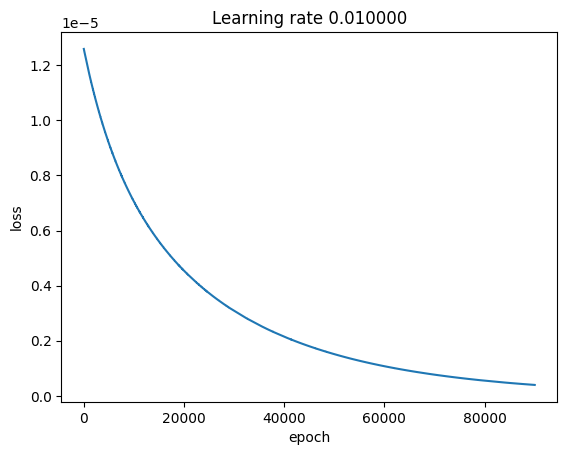

In [84]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [92]:
from numpy import exp, array, random, dot
import numpy as np

tx = array([1, 3])
test_x = torch.Tensor(np.array(tx, dtype=(np.float32)))
print(model(test_x))

tensor([4.0005], grad_fn=<ReluBackward0>)
